In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
from utils import preprocess_data
label_mappings = preprocess_data(df)
for feature, mapping in label_mappings.items():
    print(f"\n{feature}:")
    for label, code in mapping.items():
        print(f"  {label} -> {code}")


workclass:
  0 -> ?
  1 -> Federal-gov
  2 -> Local-gov
  3 -> Never-worked
  4 -> Private
  5 -> Self-emp-inc
  6 -> Self-emp-not-inc
  7 -> State-gov
  8 -> Without-pay

education:
  0 -> 10th
  1 -> 11th
  2 -> 12th
  3 -> 1st-4th
  4 -> 5th-6th
  5 -> 7th-8th
  6 -> 9th
  7 -> Assoc-acdm
  8 -> Assoc-voc
  9 -> Bachelors
  10 -> Doctorate
  11 -> HS-grad
  12 -> Masters
  13 -> Preschool
  14 -> Prof-school
  15 -> Some-college

marital.status:
  0 -> Divorced
  1 -> Married-AF-spouse
  2 -> Married-civ-spouse
  3 -> Married-spouse-absent
  4 -> Never-married
  5 -> Separated
  6 -> Widowed

occupation:
  0 -> ?
  1 -> Adm-clerical
  2 -> Armed-Forces
  3 -> Craft-repair
  4 -> Exec-managerial
  5 -> Farming-fishing
  6 -> Handlers-cleaners
  7 -> Machine-op-inspct
  8 -> Other-service
  9 -> Priv-house-serv
  10 -> Prof-specialty
  11 -> Protective-serv
  12 -> Sales
  13 -> Tech-support
  14 -> Transport-moving

relationship:
  0 -> Husband
  1 -> Not-in-family
  2 -> Other-rela

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64


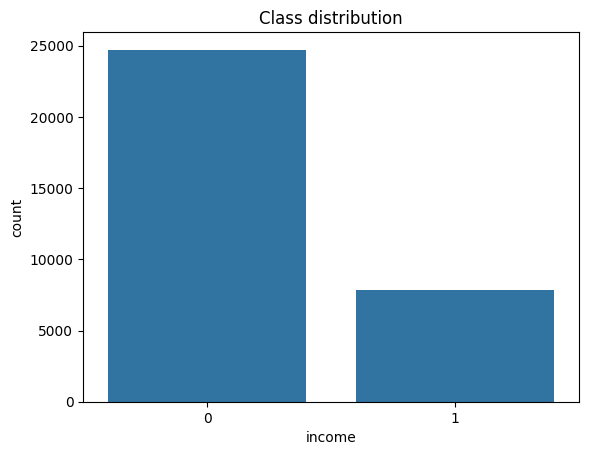

In [7]:
from utils import analyze_target_distribution
analyze_target_distribution(df)

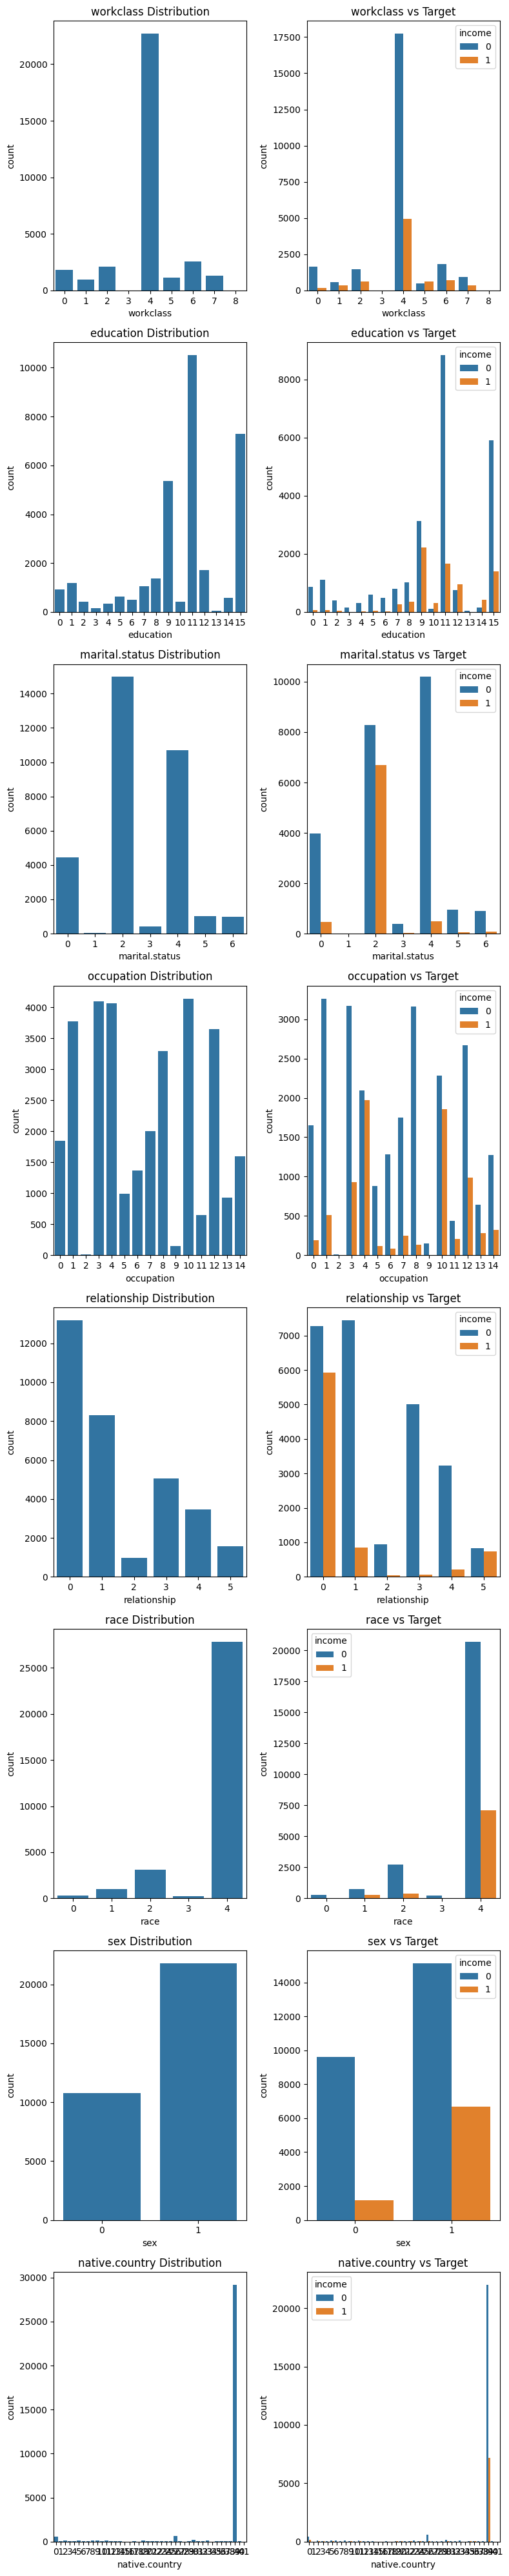

In [8]:
from utils import feature_target_relationship
feature_target_relationship(df)

Chi-squared test for workclass and income: chi2=1045.7085997281692, p-value=2.0265054311207156e-220
Chi-squared test for education and income: chi2=4429.653302288619, p-value=0.0
Chi-squared test for marital.status and income: chi2=6517.741653663022, p-value=0.0
Chi-squared test for occupation and income: chi2=4031.974280247181, p-value=0.0
Chi-squared test for relationship and income: chi2=6699.07689685885, p-value=0.0
Chi-squared test for race and income: chi2=330.9204310085741, p-value=2.305960610160958e-70
Chi-squared test for sex and income: chi2=1517.813409134445, p-value=0.0
Chi-squared test for native.country and income: chi2=317.2303857833171, p-value=2.2113858852543023e-44


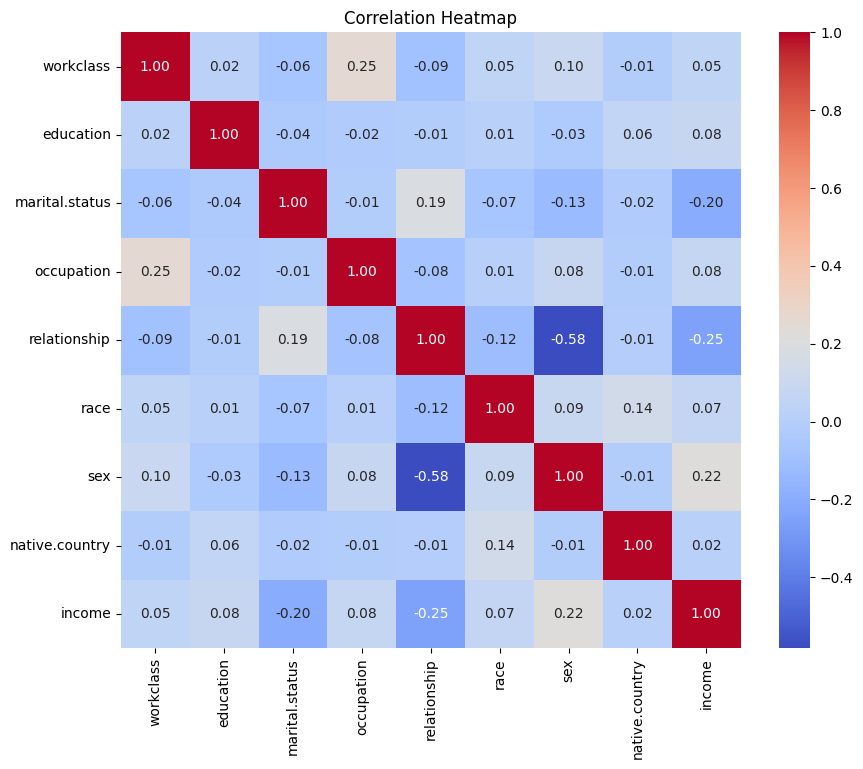

In [9]:
from utils import correlation_heatmap
correlation_heatmap(df)

### Independence assumption
Naive Bayes classifier assumes the complete independence of each feature from the other. This assumption succeeds between some features such as
- work class - relative-country
- work class - education
- marital status - education
- relationship - education
... due to their low correlation.
But it fails between others like
- work class - education
- marital-status - relationship
- occupation - work class
- race - native country
... because of the high correlation value between them

In [10]:
from utils import split_x_and_y
x, y = split_x_and_y(df)

In [11]:
x.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,0,11,6,0,1,4,0,39
1,4,11,6,4,1,4,0,39
2,0,15,6,0,4,2,0,39
3,4,5,0,7,4,4,0,39
4,4,15,5,10,3,4,0,39


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [13]:
unique_values = x.nunique()

In [14]:
from utils import split_data
x_train, x_val, x_test, y_train, y_val, y_test = split_data(x, y, 0.7, 0.15, 0.15)

In [15]:
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(22792, 8) (4884, 8) (4885, 8)
(22792,) (4884,) (4885,)


In [16]:
from NaiveBayes import NaiveBayes
model = NaiveBayes(x_train, y_train, unique_values)
accs = []
presicions = []
recalls = []
f1s = []

accuracy = 0.7932022932022932
precision = 0.5525316455696202
recall = 0.7423469387755102
f1 score = 0.6335268505079826


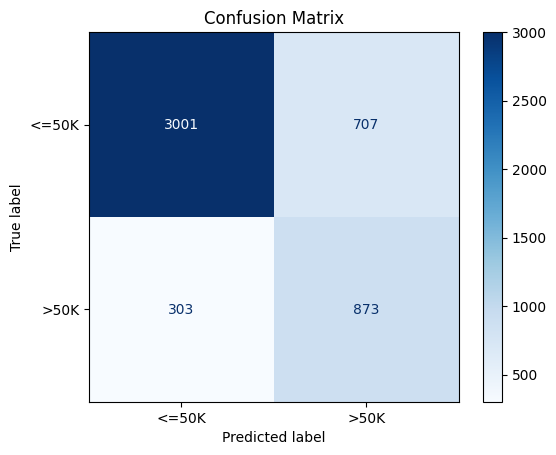

In [17]:
acc, precision, recall, f1 = model.fit_and_predict(x_val, y_val, 0.1)
accs.append(acc)
presicions.append(precision)
recalls.append(recall)
f1s.append(f1)

accuracy = 0.7932022932022932
precision = 0.5524652338811631
recall = 0.7431972789115646
f1 score = 0.6337926033357505


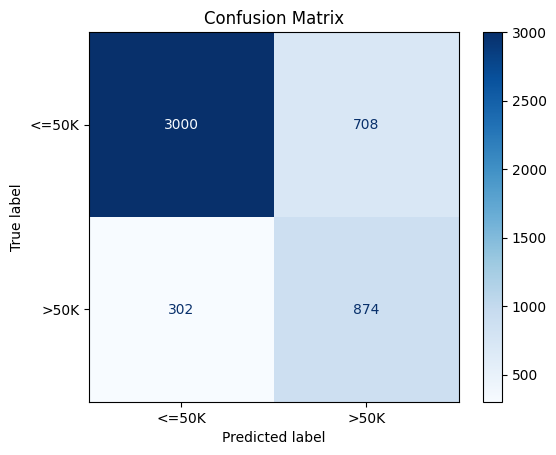

In [18]:
acc, precision, recall, f1 = model.fit_and_predict(x_val, y_val, 0.5)
accs.append(acc)
presicions.append(precision)
recalls.append(recall)
f1s.append(f1)

accuracy = 0.7925880425880426
precision = 0.5514195583596214
recall = 0.7431972789115646
f1 score = 0.6331039478449837


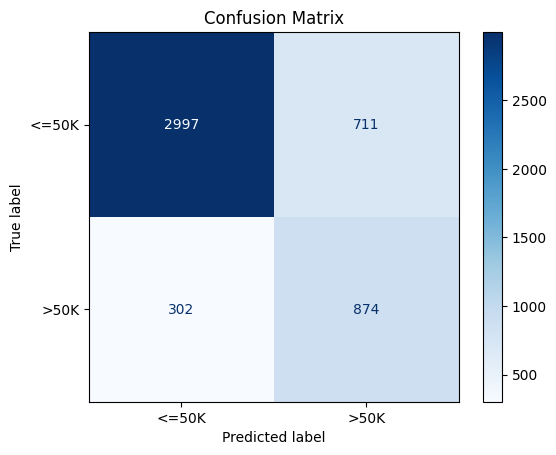

In [19]:
acc, precision, recall, f1 = model.fit_and_predict(x_val, y_val, 1)
accs.append(acc)
presicions.append(precision)
recalls.append(recall)
f1s.append(f1)

accuracy = 0.7921785421785422
precision = 0.5506607929515418
recall = 0.7440476190476191
f1 score = 0.6329113924050633


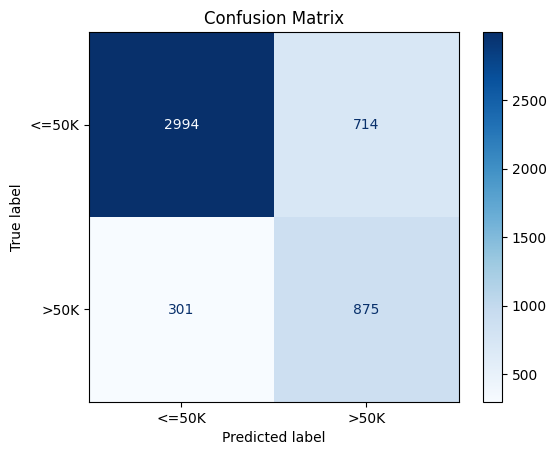

In [20]:
acc, precision, recall, f1 = model.fit_and_predict(x_val, y_val, 2)
accs.append(acc)
presicions.append(precision)
recalls.append(recall)
f1s.append(f1)

accuracy = 0.7921785421785422
precision = 0.5509171410499684
recall = 0.7406462585034014
f1 score = 0.6318462096481683


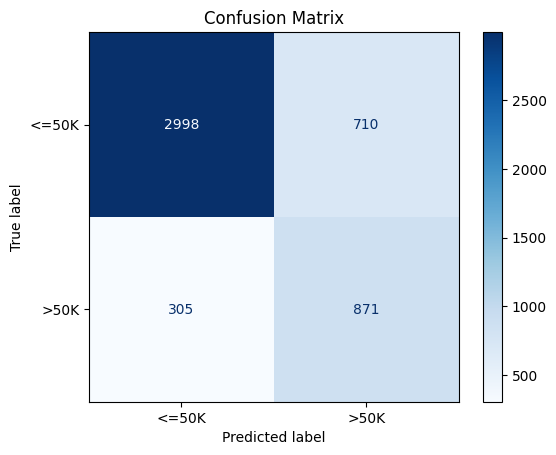

In [21]:
acc, precision, recall, f1 = model.fit_and_predict(x_val, y_val, 5)
accs.append(acc)
presicions.append(precision)
recalls.append(recall)
f1s.append(f1)


Accuracy (best to worst):
  α=0.1: 0.7932022932022932
  α=0.5: 0.7932022932022932
  α=1: 0.7925880425880426
  α=2: 0.7921785421785422
  α=5: 0.7921785421785422

Precisions (best to worst):
  α=0.1: 0.5525316455696202
  α=0.5: 0.5524652338811631
  α=1: 0.5514195583596214
  α=5: 0.5509171410499684
  α=2: 0.5506607929515418

Recall (best to worst):
  α=2: 0.7440476190476191
  α=0.5: 0.7431972789115646
  α=1: 0.7431972789115646
  α=0.1: 0.7423469387755102
  α=5: 0.7406462585034014

F1 (best to worst):
  α=0.5: 0.6337926033357505
  α=0.1: 0.6335268505079826
  α=1: 0.6331039478449837
  α=2: 0.6329113924050633
  α=5: 0.6318462096481683


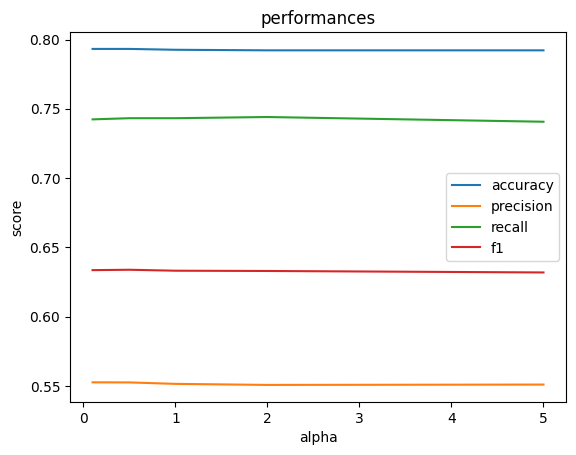

In [22]:
from utils import compare_alphas
compare_alphas(accs, presicions, recalls, f1s)

accuracy = 0.7879222108495394
precision = 0.5449871465295629
recall = 0.7210884353741497
f1 score = 0.6207906295754027


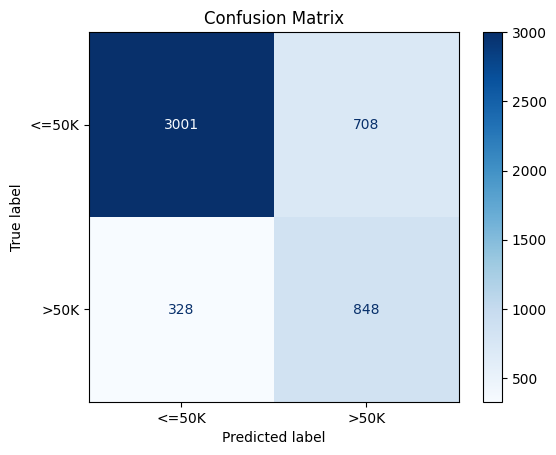

(0.7879222108495394,
 0.5449871465295629,
 0.7210884353741497,
 0.6207906295754027)

In [23]:
model.fit_and_predict(x_test, y_test, 0.5)


────────────────────────────────────────────────────────────────────────────────
Feature: WORKCLASS
────────────────────────────────────────────────────────────────────────────────

  Rank 1: 'Private'
    P(label | income <=50K) = 0.7190
    P(label | income >50K)  = 0.6341
    Difference = 0.0849
    Favors: <=50K

  Rank 2: 'Self-emp-inc'
    P(label | income <=50K) = 0.0193
    P(label | income >50K)  = 0.0785
    Difference = 0.0592
    Favors: >50K

  Rank 3: '?'
    P(label | income <=50K) = 0.0655
    P(label | income >50K)  = 0.0250
    Difference = 0.0405
    Favors: <=50K

────────────────────────────────────────────────────────────────────────────────
Feature: EDUCATION
────────────────────────────────────────────────────────────────────────────────

  Rank 1: 'Bachelors'
    P(label | income <=50K) = 0.1262
    P(label | income >50K)  = 0.2799
    Difference = 0.1536
    Favors: >50K

  Rank 2: 'HS-grad'
    P(label | income <=50K) = 0.3569
    P(label | income >50K)  = 0

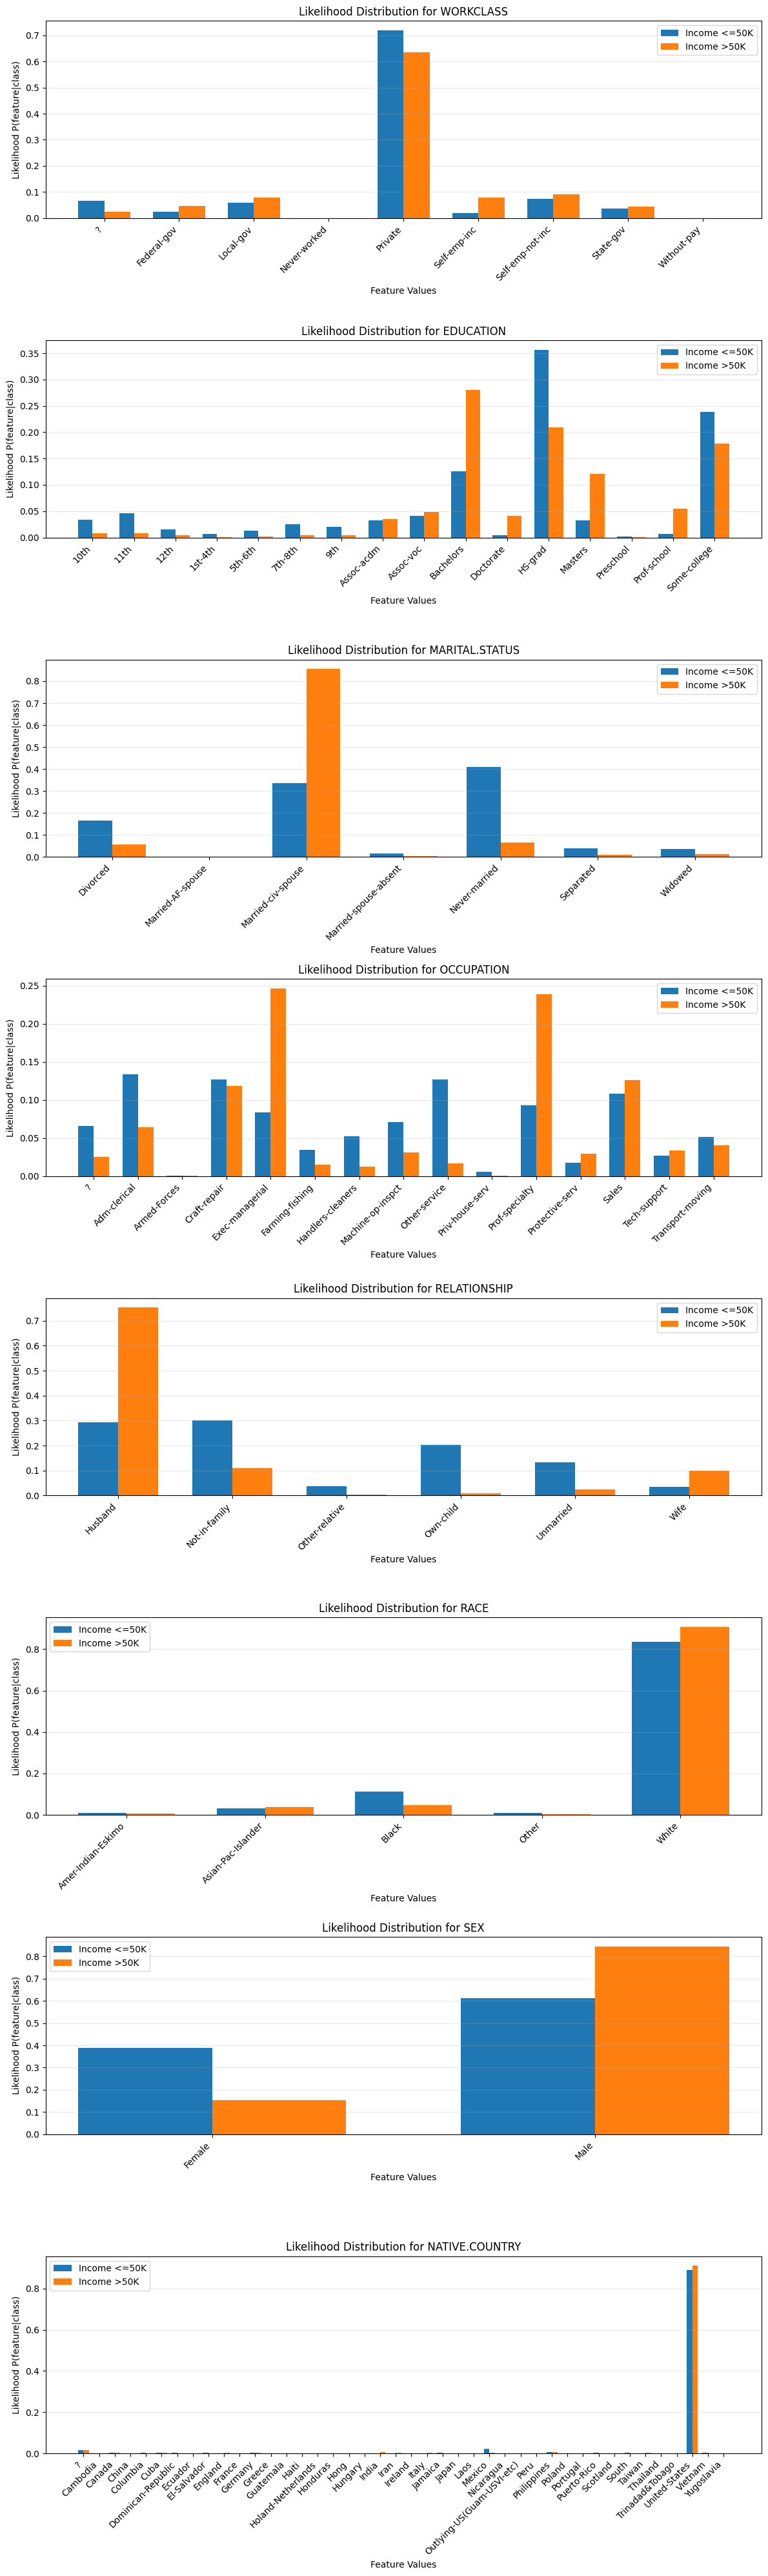

In [24]:
model.analyze_likelihoods(label_mappings)

<Figure size 1000x600 with 0 Axes>

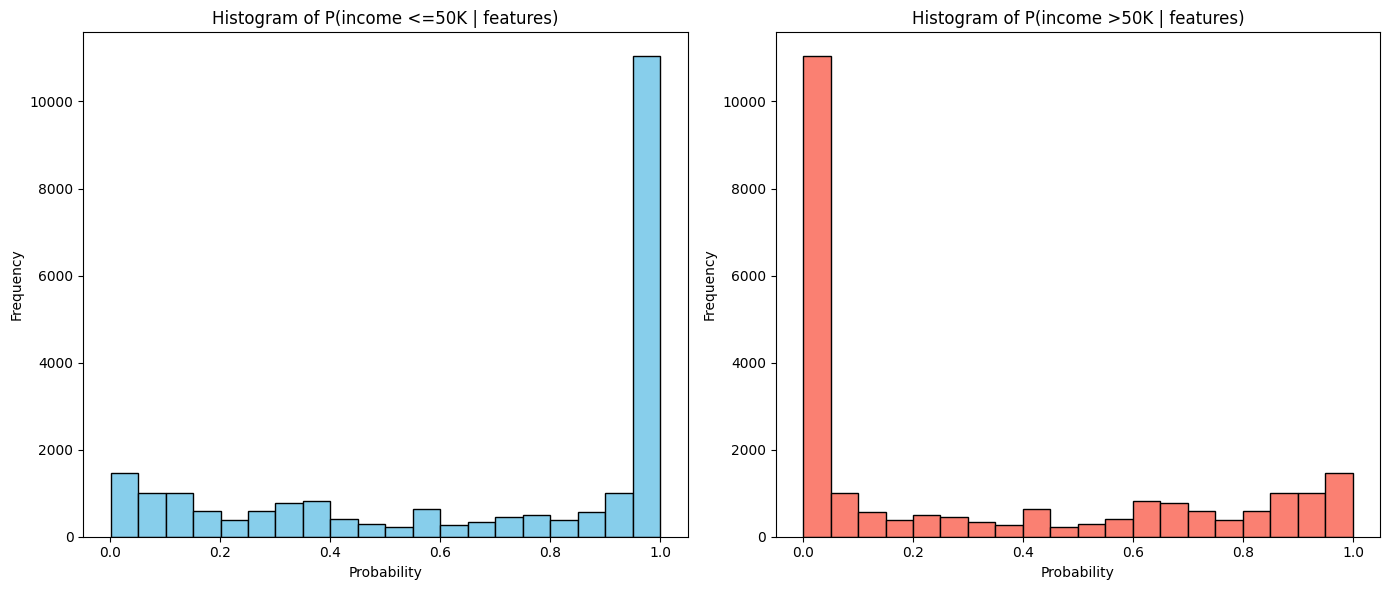

In [25]:
model.plot_probabilities()

accuracy = 0.747799385875128
precision = 0.47343453510436434
recall = 0.42431972789115646
f1 score = 0.4475336322869955


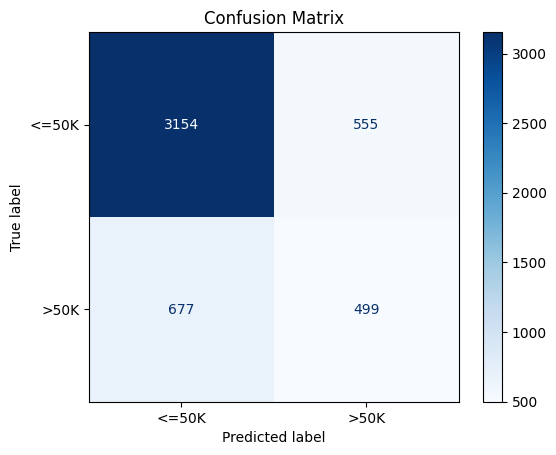

(0.747799385875128,
 0.47343453510436434,
 0.42431972789115646,
 0.4475336322869955)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from utils import evaluate
sklearn_model = MultinomialNB(alpha=0.5)
sklearn_model.fit(x_train, y_train)
y_pred = sklearn_model.predict(x_test)
evaluate(y_test, y_pred)

accuracy = 0.7879222108495394
precision = 0.5449871465295629
recall = 0.7210884353741497
f1 score = 0.6207906295754027


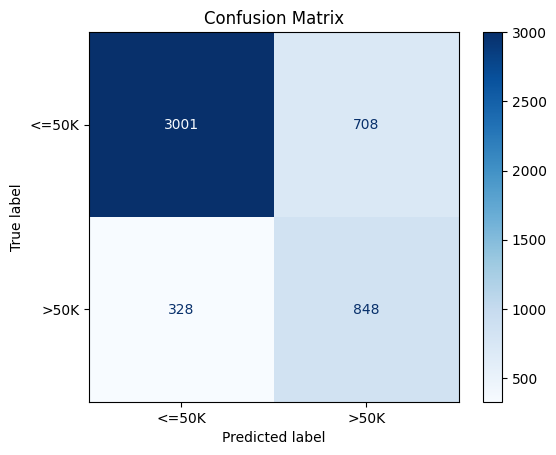

(0.7879222108495394,
 0.5449871465295629,
 0.7210884353741497,
 0.6207906295754027)

In [27]:
from sklearn.naive_bayes import CategoricalNB
sklearn_model = CategoricalNB(alpha=0.5)
sklearn_model.fit(x_train, y_train)
y_pred = sklearn_model.predict(x_test)
evaluate(y_test, y_pred)